<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/5_Analiza_danych_Pandas_cz_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Odczyt i zapis danych - pliki CSV, Excel.

Najczęściej stykamy się z danymi zapisanymi w formie plików w formacie CSV (comma separated values - wartości oddzielone przecinkiem) lub formatach utworzonych w programach do obsługi arkuszy kalkulacyjnych (Excel, OpenOffice, LibreOffice).

In [1]:
import pandas as pd
import numpy as np

Zdefiniujmy na nowo funkcję **fetch_financial_data**, obecną w poprzednim notatniku.

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

Dane, które tym razem pobierzemy, będą dotyczyć spółki Meta.

In [3]:
df = fetch_financial_data(company='META')
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-21,527.15,539.400,526.935,535.16,13423292
2024-08-20,528.35,531.090,525.880,526.73,7944391
2024-08-19,526.87,531.660,522.760,529.28,9879713
2024-08-16,531.90,533.660,524.660,527.42,14776684
2024-08-15,531.79,539.770,526.700,537.33,13482141
...,...,...,...,...,...
2019-08-30,186.78,186.802,183.459,185.67,10785722
2019-08-29,183.77,186.075,183.470,185.57,10135033
2019-08-28,180.53,181.950,178.920,181.76,9392060


## Zapis do CSV.

Za zapis odpowiada metoda **to_csv**.

In [4]:
df.to_csv('meta.csv')

Teraz z naszego obiektu spróbujmy wyciąć konkretny miesiąc - np. listopad 2021.

In [5]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2021)]
df_nov

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-30,335.0000,335.8100,323.430,324.46,25390008
2021-11-29,336.8900,340.6700,335.305,338.03,16650949
2021-11-26,335.7950,337.7500,331.902,333.12,14750737
2021-11-24,336.0000,341.7800,332.810,341.06,13566181
2021-11-23,338.9300,341.3999,333.500,337.25,17224986
2021-11-22,349.0500,353.8300,340.510,341.01,27116811
2021-11-19,342.2000,352.1000,339.900,345.30,26488541
2021-11-18,339.7200,342.4600,335.300,338.69,17487235
2021-11-17,344.2400,347.3000,340.100,340.77,13602812


I teraz ten obiekt zapiszmy do pliku.

In [6]:
df_nov.to_csv('meta_nov.csv')

## Odczyt z pliku CSV.

Do tego celu służy metoda **read_csv**.

In [7]:
new_df = pd.read_csv('meta_nov.csv')
new_df

,Date,Open,High,Low,Close,Volume
0,2021-11-30,335.0000,335.8100,323.430,324.46,25390008
1,2021-11-29,336.8900,340.6700,335.305,338.03,16650949
2,2021-11-26,335.7950,337.7500,331.902,333.12,14750737
3,2021-11-24,336.0000,341.7800,332.810,341.06,13566181
4,2021-11-23,338.9300,341.3999,333.500,337.25,17224986
5,2021-11-22,349.0500,353.8300,340.510,341.01,27116811
6,2021-11-19,342.2000,352.1000,339.900,345.30,26488541
7,2021-11-18,339.7200,342.4600,335.300,338.69,17487235
8,2021-11-17,344.2400,347.3000,340.100,340.77,13602812
9,2021-11-16,343.8300,346.6500,340.870,342.96,18181106


Nasze dane zostały wczytane ponownie, jednak - jak widzimy - z nowym indeksem. Aby zachować oryginalny indeks, ustawiamy parametr index_col na wartość 0.

In [8]:
new_df = pd.read_csv('meta_nov.csv', index_col=0)
new_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-30,335.0000,335.8100,323.430,324.46,25390008
2021-11-29,336.8900,340.6700,335.305,338.03,16650949
2021-11-26,335.7950,337.7500,331.902,333.12,14750737
2021-11-24,336.0000,341.7800,332.810,341.06,13566181
2021-11-23,338.9300,341.3999,333.500,337.25,17224986
2021-11-22,349.0500,353.8300,340.510,341.01,27116811
2021-11-19,342.2000,352.1000,339.900,345.30,26488541
2021-11-18,339.7200,342.4600,335.300,338.69,17487235
2021-11-17,344.2400,347.3000,340.100,340.77,13602812


## Zapis do Excela.

Aby zapisać dataframe jako skoroszyt Excel, stosujemy metodę **to_excel**.

In [9]:
df_nov.to_excel('meta_nov.xlsx')

## Odczyt z Excela.

Analogicznie wczytujemy dane ze skoroszytu, używając metody **read_excel**.

In [10]:
newer_df = pd.read_excel('meta_nov.xlsx', index_col=0)
newer_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-30,335.0000,335.8100,323.430,324.46,25390008
2021-11-29,336.8900,340.6700,335.305,338.03,16650949
2021-11-26,335.7950,337.7500,331.902,333.12,14750737
2021-11-24,336.0000,341.7800,332.810,341.06,13566181
2021-11-23,338.9300,341.3999,333.500,337.25,17224986
2021-11-22,349.0500,353.8300,340.510,341.01,27116811
2021-11-19,342.2000,352.1000,339.900,345.30,26488541
2021-11-18,339.7200,342.4600,335.300,338.69,17487235
2021-11-17,344.2400,347.3000,340.100,340.77,13602812


# Praca z datasetem London Bike.

Podajemy nazwę pliku, bowiem jesteśmy w katalogu roboczym Colaba.

In [11]:
bike_df = pd.read_csv('london_bike.csv')
bike_df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Wyświetlamy sobie również podstawowe informacje nt. pliku.

In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


Znamy już sposób na ustawienie indeksu zgodnego ze strukturą pliku przy jego ładowaniu. Co jednak, gdy już załadowaliśmy plik? Otóż używamy metody **timestamp** z nazwą kolumny jako argumentem.

In [14]:
bike_df = bike_df.set_index('timestamp')
bike_df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


# Łączenie danych.

Do załadowania danych, które następnie połączymy, znowu zastosujemy funkcję fetch_financial_data.

In [19]:
apple_df = fetch_financial_data('AAPL')
amazon_df = fetch_financial_data('AMZN')
google_df = fetch_financial_data('GOOGL')
uber_df = fetch_financial_data('UBER')

Podejrzymy sobie 5 pierwszych wierszy z każdego dataframe'a. Dane mają podobną strukturę.

In [20]:
print(apple_df.head())
print(amazon_df.head())
print(google_df.head())
print(uber_df.head())

              Open      High       Low   Close      Volume
Date                                                      
2024-08-21  226.52  227.9800  225.0500  226.40  34765480.0
2024-08-20  225.77  227.1700  225.4500  226.51  30299033.0
2024-08-19  225.72  225.9900  223.0400  225.89  40687813.0
2024-08-16  223.92  226.8271  223.6501  226.05  44340240.0
2024-08-15  224.60  225.3500  222.7600  224.72  46414013.0
              Open     High       Low   Close    Volume
Date                                                   
2024-08-21  179.92  182.385  178.8937  180.11  35599120
2024-08-20  177.92  179.010  177.4308  178.88  26255204
2024-08-19  177.64  178.300  176.1600  178.22  31129807
2024-08-16  177.04  178.340  176.2601  177.06  31489175
2024-08-15  174.86  177.910  173.9900  177.59  51698513
              Open     High     Low   Close    Volume
Date                                                 
2024-08-21  165.15  166.850  164.67  165.85  22901997
2024-08-20  166.90  168.640  166.

Podejrzymy też informacje nt. każdego obiektu - wszystkie mają dokładnie tyle samo wierszy.

In [21]:
print(apple_df.info())
print(amazon_df.info())
print(google_df.info())
print(uber_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-08-21 to 2019-08-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-08-21 to 2019-08-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-08-21 to 2019-08-26
Data columns (total 5 columns):
 #   Col

## Metoda concat.

Ponieważ chcielibyśmy wyróżnić, jakie kolumny należą do jakiego obiektu dot. firm, zastosujemy wyrażenie listowe, aby dodać przedrostek z nazwą firmy do nazwy kolumny.

In [22]:
apple_df.columns = [f'apple_{col.lower()}' for col in apple_df.columns]
amazon_df.columns = [f'amazon_{col.lower()}' for col in amazon_df.columns]
google_df.columns = [f'google_{col.lower()}' for col in google_df.columns]
uber_df.columns = [f'uber_{col.lower()}' for col in uber_df.columns]

In [23]:
apple_df.head()

,apple_open,apple_high,apple_low,apple_close,apple_volume
Date,,,,,
2024-08-21,226.52,227.9800,225.0500,226.40,34765480.0
2024-08-20,225.77,227.1700,225.4500,226.51,30299033.0
2024-08-19,225.72,225.9900,223.0400,225.89,40687813.0
2024-08-16,223.92,226.8271,223.6501,226.05,44340240.0
2024-08-15,224.60,225.3500,222.7600,224.72,46414013.0


Teraz użyjemy metody **concat**, aby połączyć ze sobą wszystkie obiekty. Podajemy argument objs w postaci listy obiektów i łączymy je względem osi 1 - połączony obiekt będzie mieć wszystkie kolumny ze wszystkich obiektów. Jeżeli obiekty mają różną liczbę rekordów - brakujące rekordy są uzupełniane przez NaN.

In [24]:
df = pd.concat(objs=[apple_df, amazon_df, google_df, uber_df], axis=1)
df

,apple_open,apple_high,apple_low,apple_close,apple_volume,amazon_open,amazon_high,amazon_low,amazon_close,amazon_volume,google_open,google_high,google_low,google_close,google_volume,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,,,,,,,,,,,,,,,,
2024-08-21,226.5200,227.9800,225.0500,226.4000,3.476548e+07,179.9200,182.3850,178.8937,180.1100,35599120,165.1500,166.8500,164.6700,165.8500,22901997,73.72,74.29,73.060,73.48,9290198
2024-08-20,225.7700,227.1700,225.4500,226.5100,3.029903e+07,177.9200,179.0100,177.4308,178.8800,26255204,166.9000,168.6400,166.8200,167.1800,18341533,74.27,74.48,73.280,73.31,10246486
2024-08-19,225.7200,225.9900,223.0400,225.8900,4.068781e+07,177.6400,178.3000,176.1600,178.2200,31129807,165.2800,166.6900,164.2600,166.6700,22416185,72.00,74.22,71.795,74.18,13821265
2024-08-16,223.9200,226.8271,223.6501,226.0500,4.434024e+07,177.0400,178.3400,176.2601,177.0600,31489175,161.4700,165.0600,161.1300,162.9600,24208647,72.50,73.35,71.755,72.04,11548276
2024-08-15,224.6000,225.3500,222.7600,224.7200,4.641401e+07,174.8600,177.9100,173.9900,177.5900,51698513,160.5000,161.6350,159.6100,161.3000,31524252,72.51,73.42,72.290,72.73,13711340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,51.3165,51.3843,50.5947,50.9745,8.666565e+07,89.8745,89.9870,88.2285,88.8145,61282940,60.0175,60.0175,59.2860,59.5265,18067500,33.00,33.13,32.040,32.57,6636847
2019-08-29,50.9147,51.1161,50.4651,51.0393,8.603126e+07,89.1500,89.9275,88.8625,89.3200,60360240,59.3210,59.9595,59.2640,59.7120,19641960,32.90,33.30,32.600,32.76,5811175
2019-08-28,49.8410,50.2308,49.6465,50.1840,6.535025e+07,87.7500,88.3930,87.2025,88.2125,48437860,58.2435,58.9250,58.0125,58.6875,16816580,32.56,33.05,32.260,32.59,6261038


Przejrzymy też statystyki opisowe (dla wygody transponowane), wygenerowane przez metodę **describe**. Przedtem ustawimy również sposób wyświetlania danych (metoda **set_option** z funkcją lambda jako parametr), aby uniknąć notacji wykładniczej.

In [27]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_open,1256.00,141.02,42.12,49.84,119.10,147.09,172.27,236.48
apple_high,1256.00,142.61,42.43,50.23,120.87,148.51,173.99,237.23
apple_low,1256.00,139.55,41.83,49.65,117.66,145.39,170.82,233.09
apple_close,1256.00,141.15,42.13,49.86,119.31,147.22,172.70,234.82
apple_volume,1256.00,95599210.75,53156204.84,24048344.00,60449954.69,81595727.41,113146262.33,434708544.96
amazon_open,1256.00,138.93,31.55,82.08,110.09,145.29,165.26,200.09
amazon_high,1256.00,140.63,31.71,83.48,112.81,147.33,166.89,201.20
amazon_low,1256.00,137.13,31.28,81.30,107.72,143.60,163.62,199.04
amazon_close,1256.00,138.90,31.47,81.82,110.10,145.38,165.07,200.00
amazon_volume,1256.00,70213955.15,33296350.09,17626740.00,48464310.50,61644207.50,82482591.25,311345660.00


Używając metody **corr** możemy policzyć współczynnik korelacji między poszczególnymi zmiennymi.

In [28]:
df.corr()

,apple_open,apple_high,apple_low,apple_close,apple_volume,amazon_open,amazon_high,amazon_low,amazon_close,amazon_volume,google_open,google_high,google_low,google_close,google_volume,uber_open,uber_high,uber_low,uber_close,uber_volume
apple_open,1.00,1.00,1.00,1.00,-0.57,0.52,0.52,0.51,0.51,-0.38,0.89,0.89,0.89,0.89,-0.19,0.52,0.52,0.53,0.52,-0.06
apple_high,1.00,1.00,1.00,1.00,-0.56,0.51,0.52,0.51,0.51,-0.37,0.89,0.89,0.89,0.89,-0.18,0.52,0.52,0.52,0.52,-0.05
apple_low,1.00,1.00,1.00,1.00,-0.58,0.51,0.52,0.51,0.51,-0.39,0.89,0.89,0.89,0.89,-0.19,0.53,0.53,0.53,0.53,-0.06
apple_close,1.00,1.00,1.00,1.00,-0.57,0.51,0.52,0.51,0.51,-0.38,0.89,0.89,0.89,0.89,-0.19,0.52,0.52,0.53,0.52,-0.06
apple_volume,-0.57,-0.56,-0.58,-0.57,1.00,-0.16,-0.16,-0.17,-0.17,0.63,-0.53,-0.53,-0.54,-0.53,0.47,-0.33,-0.33,-0.34,-0.33,0.22
amazon_open,0.52,0.51,0.51,0.51,-0.16,1.00,1.00,1.00,1.00,-0.20,0.68,0.68,0.68,0.68,-0.18,0.72,0.72,0.71,0.71,-0.12
amazon_high,0.52,0.52,0.52,0.52,-0.16,1.00,1.00,1.00,1.00,-0.18,0.68,0.68,0.68,0.68,-0.17,0.71,0.71,0.71,0.71,-0.12
amazon_low,0.51,0.51,0.51,0.51,-0.17,1.00,1.00,1.00,1.00,-0.21,0.68,0.68,0.68,0.68,-0.19,0.72,0.72,0.72,0.72,-0.13
amazon_close,0.51,0.51,0.51,0.51,-0.17,1.00,1.00,1.00,1.00,-0.20,0.68,0.68,0.68,0.68,-0.19,0.72,0.72,0.72,0.72,-0.12
amazon_volume,-0.38,-0.37,-0.39,-0.38,0.63,-0.20,-0.18,-0.21,-0.20,1.00,-0.41,-0.41,-0.42,-0.41,0.56,-0.38,-0.38,-0.39,-0.39,0.25


Chcemy wyświetlić korelację cen zamknięcia. Filtrujemy więc wyrażeniem listowym nazwy kolumn zawierające "close".

In [29]:
closes = [col for col in df.columns if col.endswith('close')]
closes

['apple_close', 'amazon_close', 'google_close', 'uber_close']

Teraz możemy wyciąć te dane i od razu wyliczyć dla nich korelację.

In [30]:
df[closes].corr()

,apple_close,amazon_close,google_close,uber_close
apple_close,1.00,0.51,0.89,0.52
amazon_close,0.51,1.00,0.68,0.72
google_close,0.89,0.68,1.00,0.65
uber_close,0.52,0.72,0.65,1.00


Dorzućmy do tej listy (i do obiektu z korelacjami) kolumny dot. wolumenu obrotu.

In [31]:
closes = [col for col in df.columns if col.endswith('close') or col.endswith('volume')]
closes

['apple_close',
 'apple_volume',
 'amazon_close',
 'amazon_volume',
 'google_close',
 'google_volume',
 'uber_close',
 'uber_volume']

In [32]:
df[closes].corr()

,apple_close,apple_volume,amazon_close,amazon_volume,google_close,google_volume,uber_close,uber_volume
apple_close,1.00,-0.57,0.51,-0.38,0.89,-0.19,0.52,-0.06
apple_volume,-0.57,1.00,-0.17,0.63,-0.53,0.47,-0.33,0.22
amazon_close,0.51,-0.17,1.00,-0.20,0.68,-0.19,0.72,-0.12
amazon_volume,-0.38,0.63,-0.20,1.00,-0.41,0.56,-0.39,0.25
google_close,0.89,-0.53,0.68,-0.41,1.00,-0.24,0.65,-0.08
google_volume,-0.19,0.47,-0.19,0.56,-0.24,1.00,-0.21,0.26
uber_close,0.52,-0.33,0.72,-0.39,0.65,-0.21,1.00,-0.17
uber_volume,-0.06,0.22,-0.12,0.25,-0.08,0.26,-0.17,1.00


Taki sposób łączenia danych jest zbliżony działaniem do SQL-owego joina. Z kolei zastosowanie połączenia przy użyciu metody concat z parametrem axis równym 0 pozwala dołączać dane do istniejącego obiektu niczym SQL-owy union. Użyjmy do demonstracji obiektu uber_df.

In [33]:
uber_df.head()

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2024-08-21,73.72,74.29,73.06,73.48,9290198
2024-08-20,74.27,74.48,73.28,73.31,10246486
2024-08-19,72.00,74.22,71.80,74.18,13821265
2024-08-16,72.50,73.35,71.75,72.04,11548276
2024-08-15,72.51,73.42,72.29,72.73,13711340


Wytnijmy sobie z obiektu uber_df dane dot. sierpnia 2019 r.

In [34]:
uber_eight = uber_df[(uber_df.index.month == 8) & (uber_df.index.year == 2019)]
uber_eight

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2019-08-30,33.00,33.13,32.04,32.57,6636847
2019-08-29,32.90,33.30,32.60,32.76,5811175
2019-08-28,32.56,33.05,32.26,32.59,6261038
2019-08-27,33.69,34.24,32.98,33.11,6596129
2019-08-26,33.67,33.83,33.06,33.31,5669714


Teraz wyciągniemy dane z następnego miesiąca - września 2019 r.

In [35]:
uber_nine = uber_df[(uber_df.index.month == 9) & (uber_df.index.year == 2019)]
uber_nine

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2019-09-30,30.40,30.73,30.17,30.47,5021190
2019-09-27,31.71,31.90,30.13,30.29,11875115
2019-09-26,31.72,32.13,31.13,31.57,6062457
2019-09-25,31.27,31.72,30.76,31.68,7879880
2019-09-24,33.00,33.15,31.01,31.30,10625791
2019-09-23,32.52,33.01,32.06,33.00,5526412
2019-09-20,33.98,34.22,32.50,32.60,12026857
2019-09-19,34.20,34.64,33.68,33.82,6884274
2019-09-18,34.35,34.89,33.75,34.26,6624433


Teraz połączymy te dane w jeden obiekt dataframe metodą concat wg osi 0. UWAGA: w dawnej wersji Pandas (tak jak to zademonstrowano w kursie) możliwe było to przy użyciu metody append, która została wycofana jako przestarzała.

In [38]:
uber_df_append = pd.concat([uber_nine, uber_eight], axis=0)
uber_df_append

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2019-09-30,30.40,30.73,30.17,30.47,5021190
2019-09-27,31.71,31.90,30.13,30.29,11875115
2019-09-26,31.72,32.13,31.13,31.57,6062457
2019-09-25,31.27,31.72,30.76,31.68,7879880
2019-09-24,33.00,33.15,31.01,31.30,10625791
2019-09-23,32.52,33.01,32.06,33.00,5526412
2019-09-20,33.98,34.22,32.50,32.60,12026857
2019-09-19,34.20,34.64,33.68,33.82,6884274
2019-09-18,34.35,34.89,33.75,34.26,6624433


# Case study - Google App Data Store.

Wykorzystamy dane ze sklepu aplikacji Google, znajdujące się w chmurze Google. Dane pobierzemy z adresu internetowego, przypisanego do zmiennej **url**.

In [49]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df = pd.read_csv(url)
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.00,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.00,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.00,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.00,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


## Preprocessing.

W tym segmencie będziemy standardowo eksplorować dane, sprawdzać, co znajduje się w obiekcie dataframe, rozkłady zmiennych.

Zaczniemy od wyświetlenia kolumn.

In [50]:
df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

Aby pracować wygodniej, trzeba będzie usunąć część kolumn i zestandaryzować ich nazwy. Najpierw jednak wykonajmy kopię naszego obiektu.

In [51]:
df_raw = df.copy()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

Pora na usuwanie zbędnych kolumn. Funkcja, która w bibliotece Pandas na to pozwala, to funkcja **drop**.

Usuniemy kolumny dot. adresu URL, adresu ikony, podtytułu, opisu i zakupów w aplikacji, bo będą one zbędne.

In [54]:
df = df.drop(columns=['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])
df

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.00,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.00,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.00,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,1474963671,FaTaLL,NaN,NaN,0.00,Tayrem Games,4+,EN,196750336.00,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


Jako indeks obiektu ustawimy kolumnę ID.

In [55]:
df = df.set_index('ID')
df

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.00,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.00,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.00,Games,"Games, Strategy",3/08/2019,3/08/2019


Statystyki zostały wyświetlone tylko dla czterech kolumn, a to dlatego, że to jedyne kolumny numeryczne w zbiorze.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.00,4.06,0.75,1.00,3.50,4.50,4.50,5.00
User Rating Count,7561.00,3306.53,42322.56,5.00,12.00,46.00,309.00,3032734.00
Price,16983.00,0.81,7.84,0.00,0.00,0.00,0.00,179.99
Size,17006.00,115706429.89,203647677.85,51328.00,22950144.00,56768954.00,133027072.00,4005591040.00


Jak użyć funkcji describe do danych tekstowych? Dodając parametr include='object' do funkcji. Zostaną wyświetlone dane innego rodzaju - dla kolumn wyświetla się liczba niepustych wartości, unikalnych wartości, najczęściej występującą wartość i częstotliwość jej wystąpienia.

In [57]:
df.describe(include='object').T

,count,unique,top,freq
Name,17007,16847,Additions,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


Ustandaryzujmy teraz nazwy kolumn.

In [58]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

Zamienimy wszystkie spacje na podkreślnik i litery duże na małe.

In [59]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.columns

Index(['name', 'average_user_rating', 'user_rating_count', 'price',
       'developer', 'age_rating', 'languages', 'size', 'primary_genre',
       'genres', 'original_release_date', 'current_version_release_date'],
      dtype='object')

Możemy teraz na obiekcie używać notacji z kropką między nazwą zmiennej a kolumny.

## Badanie rozkładów zmiennych.

Sprawdźmy sobie częstość wystąpienia wartości zmiennej primary_genre, która opisuje główny rodzaj aplikacji.

In [60]:
df.primary_genre.value_counts()

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60
Reference,32
Stickers,29
Finance,18
Business,16


Jak nietrudno się domyślić, lwią część wartości stanowią gry. Zwróćmy 5 najpopularniejszych gatunków.

In [61]:
df.primary_genre.value_counts().nlargest(5)

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60


Możemy te wartości zapisać w formie listy, aby je dalej przetwarzać.

In [62]:
list(df.primary_genre.value_counts().nlargest(5).index)

['Games', 'Education', 'Entertainment', 'Utilities', 'Sports']

Zbadajmy rozkład zmiennej age_rating.

In [63]:
df.age_rating.value_counts()

,count
age_rating,
4+,11806
9+,2481
12+,2055
17+,665


Są to wprawdzie dane kategoryczne, ale Pandas odczytał je jako liczby całkowite. Funkcją **plot** możemy utworzyć prosty wykres (najlepszy do wizualizacji będzie wykres słupkowy - parametr kind='bar').

<Axes: xlabel='age_rating'>

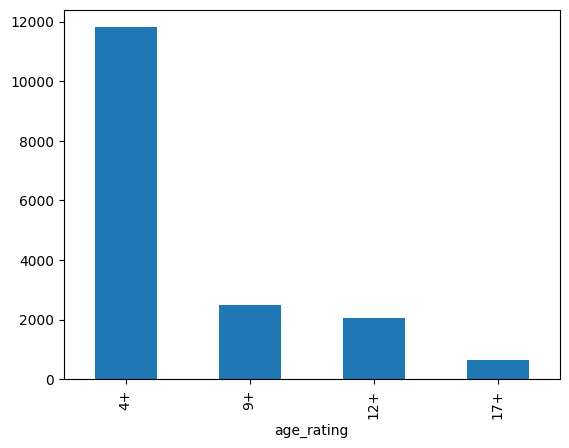

In [65]:
df.age_rating.value_counts().plot(kind='bar')

Możemy też wyświetlić wykres kołowy. Jeżeli nie chcemy, aby została wyświetlona informacja o obiekcie - wykresie, który wyświetlamy, przypiszmy go do zmiennej (najczęściej stosujemy wtedy zmienną tymczasową, mającą w nazwie tylko podkreślnik).

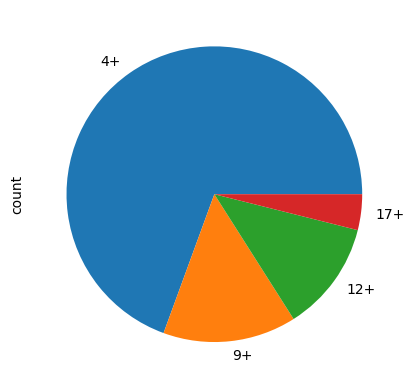

In [66]:
_ = df.age_rating.value_counts().plot(kind='pie')

Mamy też kolumnę languages. Często rekordy w niej zawierają bardzo dużo języków.

In [69]:
df.languages

,languages
ID,
284921427,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
284926400,EN
284946595,EN
285755462,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
285831220,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU..."
...,...
1474626442,EN
1474919257,EN
1474962324,EN


Z powodu tych różnych kombinacji języków mamy sporą liczbę wartości rekordów.

In [70]:
df.languages.value_counts()

,count
languages,
EN,12467
"EN, ZH",354
"CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR",277
"EN, ZH, ZH",248
"EN, DE",147
...,...
"DA, NL, EN, FI, FR, DE, IT, JA, KO, NO, PL, PT, RU, ZH, ES, SV, ZH, TR, UK",1
"EN, FR, IT, JA, KO, PT, RU, ES, TR",1
"DA, NL, EN, FR, DE, IT, NB, PL, PT, ZH, ES, SV, ZH, TR",1


Musimy pracować w tym wypadku z tekstem. W tym celu użyjemy metody **str**, dzięki której możemy w dataframe używać metod dedykowanych dla typu danych tekstowych.

In [71]:
df.languages.str.split(',').value_counts()

,count
languages,
[EN],12467
"[EN, ZH]",354
"[CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR]",277
"[EN, ZH, ZH]",248
"[EN, DE]",147
...,...
"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NO, PL, PT, RU, ZH, ES, SV, ZH, TR, UK]",1
"[EN, FR, IT, JA, KO, PT, RU, ES, TR]",1
"[DA, NL, EN, FR, DE, IT, NB, PL, PT, ZH, ES, SV, ZH, TR]",1


Użyliśmy funkcji **split**, dzielącej tekst wg użytego separatora. Dzięki temu dane w rekordach zapisane zostały w formie list. Chcemy jednak policzyć języki występujące w każdej aplikacji. Użyjemy więc ponownie metody str, a potem funkcji **len**, w ten sposób obliczając długość każdego listy.

In [72]:
df.languages.str.split(',').str.len()

,languages
ID,
284921427,17.00
284926400,1.00
284946595,1.00
285755462,17.00
285831220,15.00
...,...
1474626442,1.00
1474919257,1.00
1474962324,1.00


Wynik tych obliczeń możemy przypisać do nowej kolumny ramki danych.

In [73]:
df['lang_no'] = df.languages.str.split(',').str.len()
df

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,lang_no
ID,,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.00
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.00
284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.00
285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.00
285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.00,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019,1.00
1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.00,Games,"Games, Family, Strategy",1/08/2019,1/08/2019,1.00
1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.00,Games,"Games, Strategy",3/08/2019,3/08/2019,1.00


Teraz możemy łatwiej sprawdzić liczność poszczególnych wartości.

In [74]:
df.lang_no.value_counts()

,count
lang_no,
1.00,12566
2.00,1102
3.00,495
16.00,316
4.00,261
5.00,247
6.00,220
25.00,171
9.00,154


## Sprawdzanie braków w danych.

Jeszcze raz sprawdźmy informacje o danych. Wyraźnie widoczne jest, że nie każda kolumna jest w całości wypełniona wartościami niepustymi.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17007 entries, 284921427 to 1475076711
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          17007 non-null  object 
 1   average_user_rating           7561 non-null   float64
 2   user_rating_count             7561 non-null   float64
 3   price                         16983 non-null  float64
 4   developer                     17007 non-null  object 
 5   age_rating                    17007 non-null  object 
 6   languages                     16947 non-null  object 
 7   size                          17006 non-null  float64
 8   primary_genre                 17007 non-null  object 
 9   genres                        17007 non-null  object 
 10  original_release_date         17007 non-null  object 
 11  current_version_release_date  17007 non-null  object 
 12  lang_no                       16947 non-null  float6

Sprawdźmy rozkład zmiennej average_user_rating bez pominięcia NaN-ów - zdecydowanie najwięcej w tej kolumnie jest właśnie braków w danych.

In [76]:
df.average_user_rating.value_counts(dropna=False)

,count
average_user_rating,
NaN,9446
4.50,2861
4.00,1722
5.00,990
3.50,925
3.00,514
2.50,317
2.00,158
1.50,60


Sprawdźmy teraz, w jakich rekordach konkretnie występują braki. Bardzo w tym pomocna jest metoda **isnull**. Samo jej zastosowanie tworzy maskę wartości boolowskich na naszym obiekcie.

In [77]:
df.isnull()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,lang_no
ID,,,,,,,,,,,,,
284921427,False,False,False,False,False,False,False,False,False,False,False,False,False
284926400,False,False,False,False,False,False,False,False,False,False,False,False,False
284946595,False,False,False,False,False,False,False,False,False,False,False,False,False
285755462,False,False,False,False,False,False,False,False,False,False,False,False,False
285831220,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,False,True,True,False,False,False,False,False,False,False,False,False,False
1474919257,False,True,True,False,False,False,False,False,False,False,False,False,False
1474962324,False,True,True,False,False,False,False,False,False,False,False,False,False


Możemy natomiast zastosować dla tej maski funkcji **sum**, która zsumuje nam (zliczy) wystąpienia NaN-ów dla każdej z kolumn.

In [78]:
df.isnull().sum()

,0
name,0
average_user_rating,9446
user_rating_count,9446
price,24
developer,0
age_rating,0
languages,60
size,1
primary_genre,0
genres,0


Najprostszą metodą poradzenia sobie z brakami jest metoda **dropna**, która usuwa rekordy z brakami danych.

In [79]:
df.dropna()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,lang_no
ID,,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.00
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.00
284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.00
285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.00
285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473084135,Die Last,3.00,6.00,0.00,Jie Yang,12+,"EN, ZH",151308288.00,Games,"Games, Strategy, Entertainment, Puzzle",31/07/2019,31/07/2019,2.00
1473181500,Basic Slosh,5.00,30.00,0.00,Ashnell Marchand,4+,EN,79646720.00,Games,"Games, Entertainment, Action, Strategy",23/07/2019,23/07/2019,1.00
1473559573,Idle Racing Tycoon,5.00,51.00,0.00,Carson Brody,9+,EN,125348864.00,Games,"Games, Simulation, Strategy",31/07/2019,31/07/2019,1.00


Liczba rekordów maleje po zastosowaniu funkcji, zastosowanie tej funkcji powoduje, że ilość braków w każdej kolumnie spada do zera.

In [80]:
df.dropna().isnull().sum()

,0
name,0
average_user_rating,0
user_rating_count,0
price,0
developer,0
age_rating,0
languages,0
size,0
primary_genre,0
genres,0
